In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
df=pd.read_csv('C:/Users/RAHAT/Downloads/Stock Prediction Code/Data Range(100-200)/APEXTANRY_100_200.csv',parse_dates=['DATE'])

In [275]:
df=df.set_index('DATE')

In [276]:
df.drop(['TRADING CODE','OPEN','HIGH','LOW','VOLUME'], axis=1,inplace=True)

In [11]:
df['Close_log']=np.log(df.values)

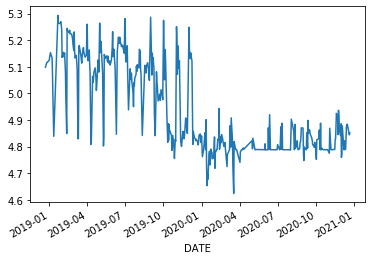

In [13]:
df['Close_log'].plot()

In [22]:
train = df.iloc[0:int(len(df.index)*0.8)]
test = df.iloc[int(len(df.index)*0.8):]

In [21]:
int(len(df.index)*0.8)

325

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
start = len(train) 
end = len(train) + len(test) - 1

In [26]:
model = ARIMA(df['Close_log'], order=(1,1,1))
model_fit = model.fit()

In [27]:
predictions =model_fit.predict(start, end, typ = 'levels').rename("Predictions")

In [38]:
test['preds']=np.exp(predictions)

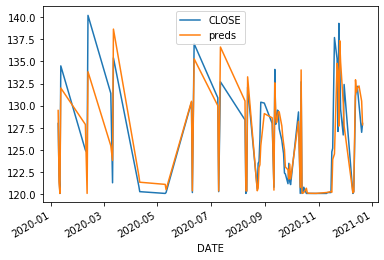

In [40]:
test['CLOSE'].plot()
test['preds'].plot()
plt.legend()

In [37]:
df

,CLOSE,Close_log,preds
DATE,,,
2018-12-23,163.8,5.098646,NaN
2018-12-24,164.6,5.103518,NaN
2018-12-26,166.6,5.115596,NaN
2018-12-27,166.7,5.116196,NaN
2019-01-01,168.1,5.124559,NaN
...,...,...,...
2020-12-14,131.8,4.881286,131.547490
2020-12-15,132.2,4.884316,131.964218
2020-12-17,130.1,4.868303,132.233118


In [4]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
np.sqrt(mean_squared_error(test["CLOSE"], test["preds"]))

2.924523844085247

In [43]:
df.drop(['preds'], axis=1,inplace=True)

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [202]:
fit1 = ExponentialSmoothing(np.asarray(train['CLOSE']) ,seasonal_periods=16,damped=False,trend='add', seasonal='add').fit()
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))


In [203]:
predictions_holt_winter=fit1.predict(start, end)

In [204]:
predictions_holt_winter

array([119.54855244, 119.26370196, 120.25170634, 120.55184537,
       119.782424  , 121.04759591, 123.53838394, 123.07131696,
       122.24304416, 122.44113711, 121.73495297, 122.52412385,
       123.01494368, 122.23761134, 122.35870876, 121.79822015,
       121.24677259, 120.96192211, 121.94992649, 122.25006552,
       121.48064415, 122.74581606, 125.2366041 , 124.76953711,
       123.94126431, 124.13935726, 123.43317313, 124.22234401,
       124.71316383, 123.93583149, 124.05692891, 123.49644031,
       122.94499275, 122.66014227, 123.64814665, 123.94828568,
       123.1788643 , 124.44403621, 126.93482425, 126.46775727,
       125.63948447, 125.83757742, 125.13139328, 125.92056416,
       126.41138398, 125.63405165, 125.75514907, 125.19466046,
       124.6432129 , 124.35836242, 125.3463668 , 125.64650583,
       124.87708446, 126.14225637, 128.63304441, 128.16597742,
       127.33770462, 127.53579757, 126.82961344, 127.61878432,
       128.10960414, 127.3322718 , 127.45336922, 126.89

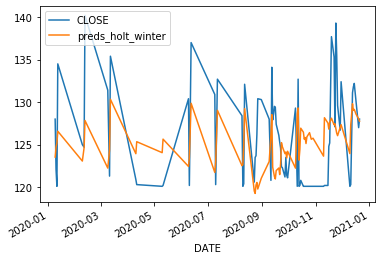

In [205]:
test['preds_holt_winter']=np.array(predictions_holt_winter)
test['CLOSE'].plot()
test['preds_holt_winter'].plot()
plt.legend()

In [191]:
test

,CLOSE,Close_log,preds,preds_holt_winter,preds_prophet
DATE,,,,,
2020-08-23,120.6,4.792479,120.400381,133.562721,122.756744
2020-08-24,123.5,4.816241,120.704426,136.275900,122.225995
2020-08-25,123.7,4.817859,123.017971,140.561294,123.629265
2020-08-26,126.2,4.837868,123.343383,144.637143,122.239714
2020-08-27,130.4,4.870607,125.485187,147.400874,124.136119
...,...,...,...,...,...
2020-12-14,131.8,4.881286,131.547490,170.376664,123.713882
2020-12-15,132.2,4.884316,131.964218,165.719479,123.178133
2020-12-17,130.1,4.868303,132.233118,163.809410,124.594632


In [174]:
train_prophet=pd.DataFrame()
train_prophet['ds']=train.index
train_prophet['y']=np.array(np.log(train['Close_log']))

In [175]:
train_prophet

,ds,y
0,2018-12-23,1.628975
1,2018-12-24,1.629930
2,2018-12-26,1.632294
3,2018-12-27,1.632411
4,2019-01-01,1.634044
...,...,...
320,2020-08-16,1.571320
321,2020-08-17,1.573167
322,2020-08-18,1.568598
323,2020-08-19,1.566354


In [6]:
from fbprophet import Prophet

In [176]:
m1 = Prophet(daily_seasonality=True)
m1.fit(train_prophet)
future1 = m1.make_future_dataframe(periods=len(test.index),freq='D')
forecast1 = m1.predict(future1)
pred_prophet=np.exp(np.exp((forecast1[['yhat']])))
p=pred_prophet.iloc[int(len(df.index)*0.8):]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [177]:
test['preds_prophet']=np.array(p)

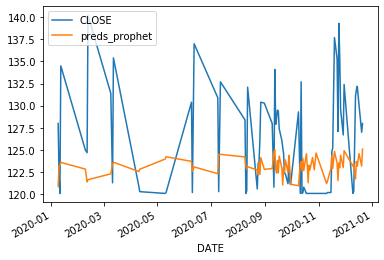

In [178]:
test['CLOSE'].plot()
test['preds_prophet'].plot()
plt.legend()

In [179]:
test

,CLOSE,Close_log,preds,preds_holt_winter,preds_prophet
DATE,,,,,
2020-08-23,120.6,4.792479,120.400381,118.328707,122.756744
2020-08-24,123.5,4.816241,120.704426,119.557816,122.225995
2020-08-25,123.7,4.817859,123.017971,121.159517,123.629265
2020-08-26,126.2,4.837868,123.343383,123.482856,122.239714
2020-08-27,130.4,4.870607,125.485187,124.622057,124.136119
...,...,...,...,...,...
2020-12-14,131.8,4.881286,131.547490,136.152066,123.713882
2020-12-15,132.2,4.884316,131.964218,137.941486,123.178133
2020-12-17,130.1,4.868303,132.233118,135.066122,124.594632


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [241]:
#SARIMA
model = SARIMAX(train['CLOSE'], order=(0, 0, 1), seasonal_order =(0, 1, 1, 7)) 
model_fit = model.fit()
# make prediction
yhat= model_fit.predict(start,end)

In [242]:
yhat

325    120.452053
326    120.553507
327    122.021880
328    122.721849
329    120.996222
          ...    
402    121.279961
403    120.553507
404    122.021880
405    122.721849
406    120.996222
Length: 82, dtype: float64

In [277]:
df=df.loc['2018-12-23':'2020-11-30']

In [278]:
train_data=df.loc['2018-12-23':'2020-10-31']
test_data=df.loc['2020-10-31':'2020-11-30']

In [279]:
test_data

,CLOSE
DATE,
2020-11-02,114.8
2020-11-03,117.7
2020-11-06,106.9
2020-11-10,106.9
2020-11-11,106.9
2020-11-15,106.9
2020-11-16,106.9
2020-11-17,106.9
2020-11-18,106.9


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [29]:
df=pd.read_csv('C:/Users/RAHAT/Downloads/Stock Prediction Code/Data Range(50-100)/BBSCABLES_50_100.csv',parse_dates=['DATE'])
df=df.set_index('DATE')
df['Close_log']=np.log(df['CLOSE'])
df['Open_log']=np.log(df['OPEN'])
df.drop(['TRADING CODE','HIGH','LOW','VOLUME'], axis=1,inplace=True)
train = df.loc['2018-12-23':'2020-10-31']
test = df.loc['2020-11-1':'2020-11-30']
start = len(train) 
end = len(train) + len(test) - 1



model = ARIMA(df['Close_log'], order=(1,1,1))
model_fit = model.fit()
predictions =model_fit.predict(start, end, typ = 'levels').rename("Predictions")
test['ARIMA']=np.exp(predictions)



fit1 = ExponentialSmoothing(np.asarray(train['CLOSE']) ,seasonal_periods=len(test), seasonal='mul').fit()
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
predictions_holt_winter=fit1.predict(start, end)
test['HOLT_WINTER']=np.array(predictions_holt_winter)


train_prophet=pd.DataFrame()
train_prophet['ds']=train.index
train_prophet['y']=np.array((train['CLOSE']))
m1 = Prophet(daily_seasonality=True,yearly_seasonality=False)
m1.fit(train_prophet)
future1 = m1.make_future_dataframe(periods=len(test.index),freq='D')
forecast1 = m1.predict(future1)
pred_prophet=(((forecast1[['yhat']])))
p=pred_prophet.iloc[len(train.index):]
test['PROPHET']=np.array(p)


model = SARIMAX(train['CLOSE'], order=(1, 1, 1), seasonal_order =(1, 1, 1, 7)) 
model_fit = model.fit()
# make prediction
yhat= model_fit.predict(start,end)
test['SARIMAX']=np.array(yhat)


span = len(test)
alpha = 2/(span+1)
model = SimpleExpSmoothing(train['CLOSE']).fit(smoothing_level=alpha)
test_predictions = model.forecast(len(test))
test['SES']=np.array(test_predictions)


var_model = VAR(endog=train[['Open_log','Close_log']])
var_model_fit = var_model.fit(maxlags=2)
pred = var_model_fit.forecast(var_model_fit.y, steps=len(test))
pred=pd.DataFrame(pred, index=test.index, columns= ['pred_open','pred_close'])
test['VAR']=np.exp(pred['pred_close'])
test.drop(['OPEN','Open_log','Close_log'], axis=1,inplace=True)



In [30]:
test

,CLOSE,ARIMA,HOLT_WINTER,PROPHET,SARIMAX,SES,VAR
DATE,,,,,,,
2020-11-01,14.9,13.930412,14.366973,17.318653,13.907910,15.4738,13.975538
2020-11-02,14.8,15.081092,14.334170,17.350061,13.815114,15.4738,14.007248
2020-11-03,14.6,14.691885,14.393671,17.617803,13.823433,15.4738,14.002686
2020-11-04,14.4,14.615986,14.416662,17.539336,13.774772,15.4738,13.997957
2020-11-05,14.3,14.354503,14.526534,17.658344,13.724287,15.4738,13.997533
2020-11-08,13.9,14.303781,14.711579,17.673992,13.644351,15.4738,13.998083
2020-11-09,15.2,13.823577,14.895238,17.806131,13.720761,15.4738,13.998385
2020-11-10,14.5,15.502716,14.684072,17.538508,13.769962,15.4738,13.998536
2020-11-11,14.2,14.229587,14.260920,17.569915,13.683673,15.4738,13.998683


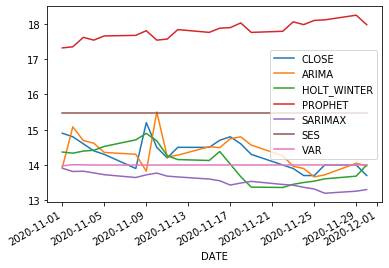

In [31]:
test.plot()

In [46]:
df['CLOSE_DIFF']=(df['CLOSE']).diff()

In [47]:
x, x_diff = df['CLOSE'].iloc[0], df['CLOSE_DIFF'].iloc[1:]
df['CLOSE+ORG'] = np.r_[x, x_diff].cumsum().astype(float)

In [192]:
df=pd.read_csv('C:/Users/RAHAT/Downloads/Stock Prediction Code/Data Range(200-300)/APEXFOOT_200_300.csv',parse_dates=['DATE'])
df=df.set_index('DATE')
df['Close_log']=np.log(df['CLOSE'])
df['Open_log']=np.log(df['OPEN'])
df['CLOSE_DIFF']=(df['CLOSE']).diff()
df['OPEN_DIFF']=(df['OPEN']).diff()
df.drop(['TRADING CODE','HIGH','LOW','VOLUME'], axis=1,inplace=True)
train = df.loc['2018-12-23':'2020-10-31']
test = df.loc['2020-11-1':'2020-11-30']
# test.drop(['Close_log','CLOSE_DIFF'], axis=1,inplace=True)
train.dropna(inplace=True)
start = len(train) 
end = len(train) + len(test) - 1

In [193]:
var_model = VAR(endog=train[['Open_log','Close_log']])
var_model_fit = var_model.fit(maxlags=2)
pred = var_model_fit.forecast(var_model_fit.y, steps=len(test))
pred=pd.DataFrame(pred, index=test.index, columns= ['pred_open','pred_close'])
test['VAR_log']=np.exp(pred['pred_close'])


In [194]:
var_model = VAR(endog=train[['OPEN_DIFF','CLOSE_DIFF']])
x = var_model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,5.680,5.702,293.1,5.689
1,5.303,5.368,200.9,5.329
2,5.163,5.271,174.7,5.206
3,5.124,5.275,168.0,5.184
4,5.027,5.222*,152.6,5.105
5,5.006,5.244,149.3,5.100
6,4.979,5.260,145.3,5.091*
7,4.992,5.317,147.3,5.122
8,5.002,5.370,148.8,5.148
9,5.010,5.421,150.0,5.174


In [195]:
var_model = VAR(endog=train[['OPEN_DIFF','CLOSE_DIFF']])
var_model_fit = var_model.fit(5)
pred = var_model_fit.forecast(y=np.array(test[['OPEN_DIFF','CLOSE_DIFF']]), steps=len(test))
pred=pd.DataFrame(pred, index=test.index, columns= ['pred_open','pred_close'])
test['VAR_diff']=(pred['pred_close'])

In [196]:
x, x_diff = test['CLOSE'].iloc[0], test['VAR_diff'].iloc[1:]
test['VAR_diff'] = np.r_[x, x_diff].cumsum().astype(float)
# test.drop(['OPEN'], axis=1,inplace=True)

In [197]:
var_model = VAR(endog=train[['OPEN','CLOSE']])
var_model_fit = var_model.fit(maxlags=2)
pred = var_model_fit.forecast(var_model_fit.y, steps=len(test))
pred=pd.DataFrame(pred, index=test.index, columns= ['pred_open','pred_close'])
test['VAR']=(pred['pred_close'])

In [198]:
test.drop(['OPEN','OPEN_DIFF','Open_log','Close_log','CLOSE_DIFF'], axis=1,inplace=True)

In [199]:
test

,CLOSE,VAR_log,VAR_diff,VAR
DATE,,,,
2020-11-01,219.3,219.431036,219.300000,219.413801
2020-11-02,219.3,219.480654,218.579785,219.454231
2020-11-03,219.3,219.552583,218.593681,219.523596
2020-11-04,219.3,219.619786,218.488722,219.588033
2020-11-05,219.3,219.687297,218.306380,219.652584
2020-11-08,219.3,219.754171,218.102009,219.716563
2020-11-09,219.3,219.820585,218.005708,219.780092
2020-11-10,219.3,219.886511,217.772715,219.843152
2020-11-11,219.3,219.951958,217.565474,219.905751


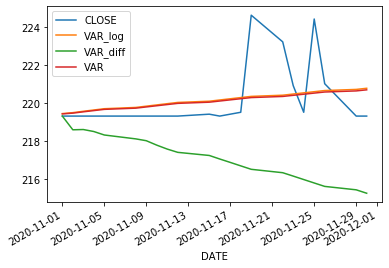

In [200]:
test.plot()

In [201]:
np.sqrt(mean_squared_error(test["CLOSE"], test["VAR_diff"]))

3.823021976157281

In [111]:
fit1 = ExponentialSmoothing(np.asarray(train['CLOSE_DIFF']) ,seasonal_periods=len(test), seasonal='add').fit(optimized=True, use_brute=True)
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
predictions_holt_winter=fit1.predict(start, end)
test['HOLT_WINTER_diff']=np.array(predictions_holt_winter)

In [112]:
fit1 = ExponentialSmoothing(np.asarray(train['CLOSE']) ,seasonal_periods=len(test), seasonal='add').fit()
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
predictions_holt_winter=fit1.predict(start, end)
test['HOLT_WINTER']=np.array(predictions_holt_winter)

In [113]:
fit1 = ExponentialSmoothing(np.asarray(train['Close_log']) ,seasonal_periods=len(test), seasonal='add').fit()
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
predictions_holt_winter=fit1.predict(start, end)
test['HOLT_WINTER_log']=np.exp(predictions_holt_winter)

In [114]:
x, x_diff = test['CLOSE'].iloc[0], test['HOLT_WINTER_diff'].iloc[1:]
test['HOLT_WINTER_diff'] = np.r_[x, x_diff].cumsum().astype(float)
# test.drop(['OPEN'], axis=1,inplace=True)

KeyError: "['OPEN'] not found in axis"

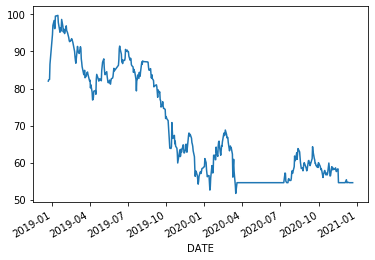

In [115]:
df['CLOSE'].plot()

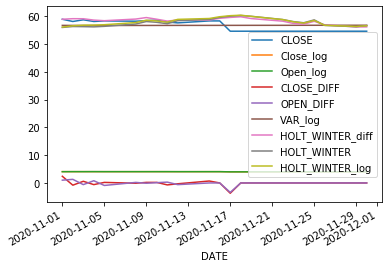

In [116]:
test.plot()

In [117]:
np.sqrt(mean_squared_error(test["CLOSE"], test["HOLT_WINTER_diff"]))

2.4121773623337006

In [80]:
import datetime as dt

In [81]:
# df["DATE"] = pd.to_datetime(df["DATE"])

In [18]:
df=pd.read_csv('C:/Users/RAHAT/Downloads/Stock Prediction Code/Data Range(100-200)/APEXFOODS_100_200.csv',parse_dates=['DATE'])

In [19]:
df=df.set_index('DATE')
df['Close_log']=np.log(df['CLOSE'])
df['Open_log']=np.log(df['OPEN'])
df.drop(['TRADING CODE','HIGH','LOW','VOLUME'], axis=1,inplace=True)
train = df.loc['2018-12-23':'2020-10-31']
test = df.loc['2020-11-1':'2020-11-30']

start = len(train) 
end = len(train) + len(test) - 1

In [9]:
from statsmodels.tsa.api import VAR

In [14]:
train

,OPEN,CLOSE,Close_log,Open_log
DATE,,,,
2018-12-23,165.8,163.8,5.098646,5.110782
2018-12-24,167.6,164.6,5.103518,5.121580
2018-12-26,167.8,166.6,5.115596,5.122773
2018-12-27,166.0,166.7,5.116196,5.111988
2019-01-01,166.8,168.1,5.124559,5.116795
...,...,...,...,...
2020-10-21,120.1,120.1,4.788325,4.788325
2020-10-22,120.1,120.1,4.788325,4.788325
2020-10-25,120.1,120.1,4.788325,4.788325


In [80]:
var_model = VAR(endog=train[['Open_log','Close_log']])
var_model_fit = var_model.fit(maxlags=4)
#Print a summary of the model results
# var_model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



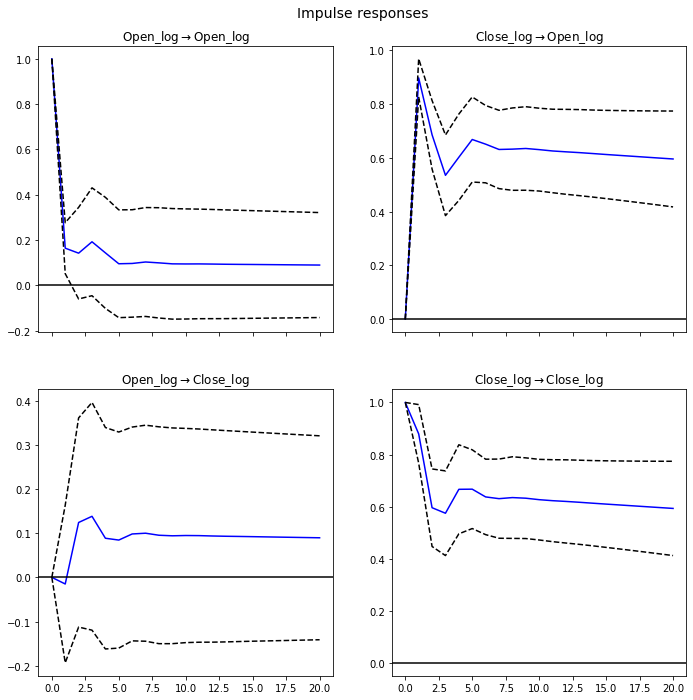

In [81]:
# Impulse Response Analysis
irf = var_model_fit.irf(20)
irf.plot()
plt.show()

In [82]:
pred = var_model_fit.forecast(var_model_fit.y, steps=len(test))

In [83]:
pred=pd.DataFrame(pred, index=test.index, columns= ['pred_open','pred_close'])

In [84]:
pred['pred_close']=np.exp(pred['pred_close'])

In [85]:
test['var']=pred['pred_close']

In [86]:
test

,OPEN,CLOSE,Close_log,Open_log,var
DATE,,,,,
2020-11-01,120.1,120.1,4.788325,4.788325,120.062655
2020-11-02,120.1,124.7,4.825911,4.788325,120.025156
2020-11-03,124.7,121.3,4.798267,4.825911,120.041320
2020-11-04,122.9,120.3,4.789989,4.811371,120.062604
2020-11-05,121.3,120.2,4.789157,4.798267,120.065097
2020-11-08,121.0,120.4,4.790820,4.795791,120.066295
2020-11-09,120.2,120.8,4.794136,4.789157,120.072875
2020-11-10,120.4,120.1,4.788325,4.790820,120.080232
2020-11-11,120.1,120.2,4.789157,4.788325,120.086010


In [207]:
train_prophet=pd.DataFrame()
train_prophet['ds']=train.index
train_prophet['y']=np.array((train['CLOSE_DIFF']))
m1 = Prophet(daily_seasonality=True)
m1.fit(train_prophet)
future1 = m1.make_future_dataframe(periods=len(test.index),freq='D')
forecast1 = m1.predict(future1)
pred_prophet=(((forecast1[['yhat']])))
p=pred_prophet.iloc[len(train.index):]
test['PROPHET_diff']=np.array(p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [208]:
x, x_diff = test['CLOSE'].iloc[0], test['PROPHET_diff'].iloc[1:]
test['PROPHET_diff'] = np.r_[x, x_diff].cumsum().astype(float)

In [209]:
test

,CLOSE,VAR_log,VAR_diff,VAR,PROPHET_diff
DATE,,,,,
2020-11-01,219.3,219.431036,219.300000,219.413801,219.300000
2020-11-02,219.3,219.480654,218.579785,219.454231,218.267598
2020-11-03,219.3,219.552583,218.593681,219.523596,218.562463
2020-11-04,219.3,219.619786,218.488722,219.588033,218.440759
2020-11-05,219.3,219.687297,218.306380,219.652584,218.133816
2020-11-08,219.3,219.754171,218.102009,219.716563,217.880865
2020-11-09,219.3,219.820585,218.005708,219.780092,218.168903
2020-11-10,219.3,219.886511,217.772715,219.843152,217.139546
2020-11-11,219.3,219.951958,217.565474,219.905751,216.110697


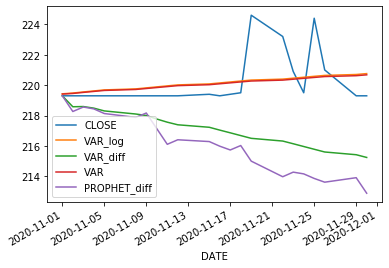

In [210]:
test.plot()

In [220]:
fit1 = ExponentialSmoothing(np.asarray(train['CLOSE_DIFF']) ,seasonal_periods=len(test), seasonal='add').fit(optimized=True, use_brute=True)
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
predictions_holt_winter=fit1.predict(start, end)
test['HOLT_WINTER_diff']=np.array(predictions_holt_winter)

In [221]:
x, x_diff = test['CLOSE'].iloc[0], test['HOLT_WINTER_diff'].iloc[1:]
test['HOLT_WINTER_diff'] = np.r_[x, x_diff].cumsum().astype(float)
# test.drop(['OPEN'], axis=1,inplace=True)

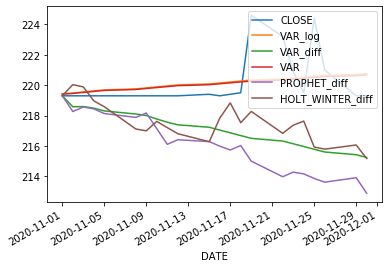

In [222]:
test.plot()

In [231]:
span = len(test)
alpha = 2/(span+1)
model = SimpleExpSmoothing(train['CLOSE']).fit(smoothing_level=alpha)
test_predictions = model.forecast(len(test))
test['SES_diff']=np.array(test_predictions)


In [225]:
x, x_diff = test['CLOSE'].iloc[0], test['SES_diff'].iloc[1:]
test['SES_diff'] = np.r_[x, x_diff].cumsum().astype(float)

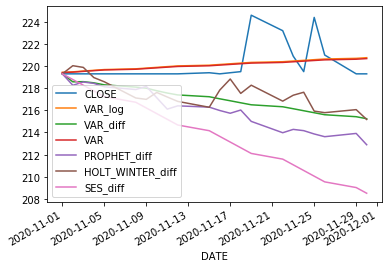

In [226]:
test.plot()

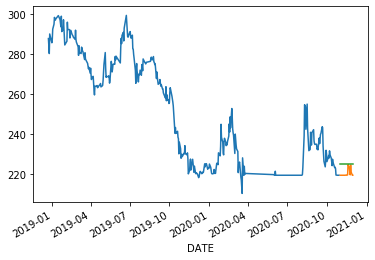

In [232]:
train['CLOSE'].plot()
test['CLOSE'].plot()
test['SES_diff'].plot()

In [233]:
import statsmodels.api as sm

In [234]:
resDiff = sm.tsa.arma_order_select_ic(train['CLOSE'], max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (4, 3) is the best.


In [247]:
from pmdarima.arima import auto_arima

auto_model = auto_arima(train['CLOSE_DIFF'].to_numpy(), m=2, seasonal=True,
                        suppress_warnings = True,  
                        step_wise=True, trace=True)           
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[2] intercept   : AIC=2123.262, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=2129.960, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[2] intercept   : AIC=2121.411, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[2] intercept   : AIC=2121.494, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=2128.980, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=2121.152, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[2] intercept   : AIC=2121.525, Time=0.15 sec
 ARIMA(1,0,0)(1,0,1)[2] intercept   : AIC=2123.293, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=2121.483, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=2119.932, Time=0.12 sec
 ARIMA(0,0,1)(1,0,0)[2] intercept   : AIC=2121.463, Time=0.17 sec
 ARIMA(0,0,1)(1,0,1)[2] intercept   : AIC=2123.362, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[2]             : AIC=2119.444, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[2]             : AIC=2121.044, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[2]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  384
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1057.722
Date:                Thu, 24 Dec 2020   AIC                           2119.444
Time:                        07:35:33   BIC                           2127.345
Sample:                             0   HQIC                          2122.578
                                - 384                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1815      0.031     -5.889      0.000      -0.242      -0.121
sigma2        14.4543      0.641     22.563      0.000      13.199      15.710
===================================================================================
Ljung-Box (Q):                       40.55   Jarque-Bera (JB):               271.28
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.71
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [248]:
model = SARIMAX(endog=train['CLOSE_DIFF'].to_numpy(), order=(0, 0, 1), seasonal_order =(0,0,0,2)) 
model_fit = model.fit(disp=False)
# make prediction
yhat= model_fit.predict(start,end)
test['SARIMAX_diff']=np.array(yhat)

In [249]:
x, x_diff = test['CLOSE'].iloc[0], test['SARIMAX_diff'].iloc[1:]
test['SARIMAX_diff']= np.r_[x, x_diff].cumsum().astype(float)

In [250]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  384
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1057.722
Date:                Thu, 24 Dec 2020   AIC                           2119.444
Time:                        07:37:11   BIC                           2127.345
Sample:                             0   HQIC                          2122.578
                                - 384                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1815      0.031     -5.889      0.000      -0.242      -0.121
sigma2        14.4543      0.641     22.563      0.000      13.199      15.710
===================================================================================
Ljung-Box (Q):                       40.55   Jarque-Bera (JB):               271.28
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.71
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [251]:
test

,CLOSE,VAR_log,VAR_diff,VAR,PROPHET_diff,HOLT_WINTER_diff,SES_diff,SARIMAX,SARIMAX_diff
DATE,,,,,,,,,
2020-11-01,219.3,219.431036,219.300000,219.413801,219.300000,219.300000,224.695021,219.300921,219.3
2020-11-02,219.3,219.480654,218.579785,219.454231,218.267598,220.035275,224.695021,219.300921,219.3
2020-11-03,219.3,219.552583,218.593681,219.523596,218.562463,219.882760,224.695021,219.300921,219.3
2020-11-04,219.3,219.619786,218.488722,219.588033,218.440759,218.964968,224.695021,219.300921,219.3
2020-11-05,219.3,219.687297,218.306380,219.652584,218.133816,218.582939,224.695021,219.300921,219.3
2020-11-08,219.3,219.754171,218.102009,219.716563,217.880865,217.118557,224.695021,219.300921,219.3
2020-11-09,219.3,219.820585,218.005708,219.780092,218.168903,216.995250,224.695021,219.300921,219.3
2020-11-10,219.3,219.886511,217.772715,219.843152,217.139546,217.619300,224.695021,219.300921,219.3
2020-11-11,219.3,219.951958,217.565474,219.905751,216.110697,217.207669,224.695021,219.300921,219.3


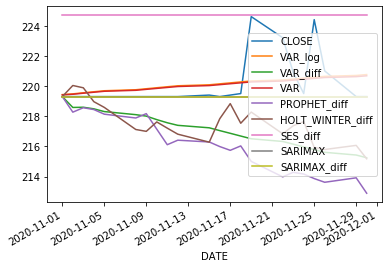

In [252]:
test.plot()